# Iris Project - Prajyoti Kumbhar

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### step 1 - Read the Dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


###  step 2 -Perform basic data quality checks 

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1)

### step 3 - Seperate x and y (species)

In [10]:
x = df.drop(columns=["species"])
y = df[["species"]]

In [11]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [13]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

### Step 4 - Preprocessing the data

In [14]:
#Importing Libraries
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform='pandas')

In [16]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [17]:
x_pre = num_pipe.fit_transform(x)

In [18]:
x_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [19]:
import pickle 
with open("Pipeline.pkl","wb") as file1:
    pickle.dump(num_pipe,file1)

### Step 5 - Apply train test split 

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pre,y,test_size=0.33,random_state=42)

In [21]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [22]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [23]:
y_train.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [24]:
y_test.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [25]:
x_train.shape

(100, 4)

In [26]:
x_test.shape

(50, 4)

In [27]:
y_train.shape

(100, 1)

In [28]:
y_test.shape

(50, 1)

### step 6 - Model Building

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [30]:
model.fit(x_train,y_train)

LogisticRegression()

### Step 7 - Model Evalution

In [31]:
model.score(x_train,y_train)

0.96

In [32]:
model.score(x_test,y_test)

0.98

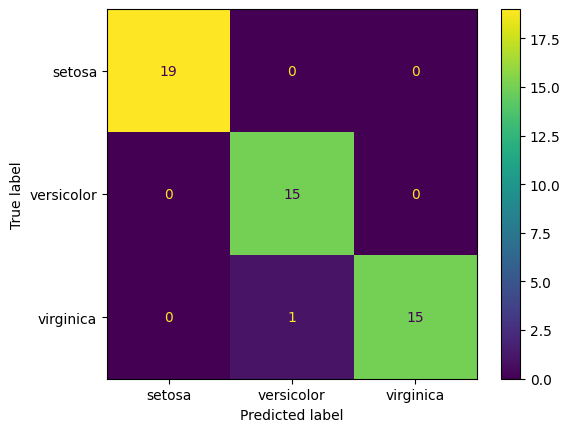

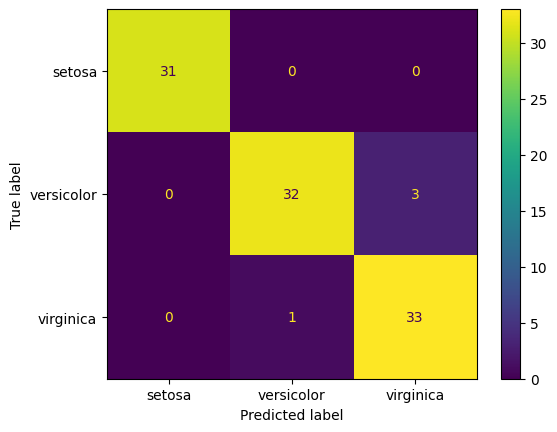

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)
ConfusionMatrixDisplay.from_estimator(model,x_train,y_train)

In [34]:
y_pred_train =model.predict(x_train)

In [35]:
y_pred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [36]:
y_train.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [37]:
y_pred_test =model.predict(x_test)

In [38]:
y_pred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [39]:
y_test.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [41]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       0.97      0.91      0.94        35
   virginica       0.92      0.97      0.94        34

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [42]:
from sklearn.model_selection import  cross_val_score
scores= cross_val_score(model,x_train,y_train,cv=5,scoring="f1_macro")
scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [43]:
scores.mean()

np.float64(0.9319552669552669)

### Above results confirms that my model is good

### Save the model object

In [44]:
with open("model.pkl","wb") as file2:
    pickle.dump(model,file2)

### Loding the pickle files for future use

### use rb method


In [45]:
with open ("Pipeline.pkl","rb") as file3:
    p=pickle.load(file3)

In [46]:
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [47]:
with open("model.pkl","rb")as file4:
    m=pickle.load(file4)

In [48]:
m

LogisticRegression()